In [96]:
!pip install pyspellchecker
!pip install emoji --upgrade

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tag import pos_tag 
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from textblob import TextBlob
from nltk.corpus import stopwords 
import re,string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup
from spellchecker import SpellChecker
import emoji
import pandas as pd

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from nltk.corpus import wordnet
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#pyspellchecker
spell = SpellChecker()


Requirement already up-to-date: emoji in /usr/local/lib/python3.6/dist-packages (0.6.0)


In [97]:

filename = 'test_labels_hinglish.txt'
f = open(filename, "a")
f.write("\n,")
f.close()


In [98]:


filename1 = 'test_labels_hinglish.txt'
f1 = open(filename1, "r")
test_labels = []
labels = []
test_labels = f1.readlines()
n = 0
while n<len(test_labels):
  tmp1 = test_labels[n].replace("\n", "").split(",")
  labels.append(tmp1[0])
  labels.append(tmp1[1])
  n += 1
filename = 'Hindi_test_unalbelled_conll_updated.txt' 
i = 0 
x = ""
f = open(filename, "r")
mylines =  ""
i = 0
t = []

print(len(labels))
import csv
with open('test1_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN", "Tweet", "Label"])
    t = f.readlines()
    while i < len(t):
      word = t[i]
      tmp = ""
      tmp = word.replace("\n", " ").replace("Hin", "").replace("Eng", "")
      x = tmp.split('\t')
      if ('EMT' in x):
        print()
      else:
        if ("meta" in x) or ((i+1)==len(t)):
          if ((i+1)==len(t)):
            writer.writerow([sn, mylines, label])
          else:
            if (i>0):
              writer.writerow([sn, mylines, label])

            sn = x[1].replace(" ", "")
            label = labels[labels.index(sn) + 1 ].replace(" ", "")
            
            #print(mylines)
            mylines =  ""
        else:
          if (len(tmp.split()) != 0):
            mylines += tmp + " " #(f.readline()).rstrip('\n')
          
      i += 1
  
filename = 'train_conll.txt'
i = 0 
x = ""
f = open(filename, "r")
mylines =  ""
i = 0
t = []

import csv
with open('test_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["SN", "Tweet", "label"])

    t = f.readlines()

    while i < len(t):
      word = t[i]
      
      tmp = ""
      tmp = word.replace("\n", " ").replace("Hin", "")
      x = tmp.split()
      if ('EMT' in x):
        print()
      else:
        if "meta" in x:
          if (i>0):
            writer.writerow([sn, mylines, label])

          sn = x[1].replace(" ", "")
          label = x[2].replace(" ", "")
          
          #print(mylines)
          mylines =  ""
        else:
          if (len(tmp.split()) != 0):
            tmp = tmp.split()[0]
          mylines += tmp + " " #(f.readline()).rstrip('\n')
        
          
      i += 1
  
  

data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin") 
data

6006

































































































































































































































































































































































































































































































































































,SN,Tweet,label
0,3,@ AdilNisarButt pakistan ka ghra tauq he Pakis...,negative
1,41,Madarchod mulle ye mathura me Nahi dikha tha j...,negative
2,48,@ narendramodi Manya Pradhan Mantri mahoday Sh...,positive
3,64,@ Atheist _ Krishna Jcb full trend me chal rah...,positive
4,66,@ AbhisharSharma _ @ RavishKumarBlog Loksabha ...,positive
...,...,...,...
15125,44345,Wow this is so sad ð­ð­ð­ I don â t AL...,negative
15126,44673,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,negative
15127,45085,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,negative
15128,45096,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,negative


In [99]:

data = pd.read_csv("test_data.csv",skip_blank_lines=True,encoding = "latin") 

In [100]:

data2 = pd.read_csv("test1_data.csv",skip_blank_lines=True,encoding = "latin")
data2

,SN,Tweet,Label
0,20803,@\tO 454dkhan\t @\tO Heisunberg\t _\tO Ag...,neutral
1,20187,logon\t ko\t alloo\t pyaz\t tomator\t me\...,neutral
2,20953,@\tO LambaAlka\t Wafadaar\t bane\t rahane\...,neutral
3,13777,@\tO varnishant\t @\tO narendramodi\t Chup...,negative
4,20990,RT\t @\tO HardeepSPuri\t Ã Â¨Â¦Ã Â¨Â¾Ã Â¨Â¤...,positive
...,...,...,...
2995,10425,@\tO i\t _\tO yogesh22\t @\tO atulreellif...,neutral
2996,14162,Ã°Å¸â¢ÂÃ°Å¸â¢ÂÃ°Å¸â¢Â\tO you\t da\t r...,neutral
2997,15860,RT\t @\tO Nimra\t _\tO Khan241\t Fahad\t ...,neutral
2998,25435,RT\t @\tO fralaliciouxxe\t tbh\t i\t have...,neutral


In [101]:
data

,SN,Tweet,label
0,3,@ AdilNisarButt pakistan ka ghra tauq he Pakis...,negative
1,41,Madarchod mulle ye mathura me Nahi dikha tha j...,negative
2,48,@ narendramodi Manya Pradhan Mantri mahoday Sh...,positive
3,64,@ Atheist _ Krishna Jcb full trend me chal rah...,positive
4,66,@ AbhisharSharma _ @ RavishKumarBlog Loksabha ...,positive
...,...,...,...
15125,44345,Wow this is so sad ð­ð­ð­ I don â t AL...,negative
15126,44673,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,negative
15127,45085,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,negative
15128,45096,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,negative


In [102]:
#removes all emojis
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [103]:
def removal_of_noise(sent):
    clean_sent=[]
    temp_st=""
    list_sent=sent.split(" ")
    c=0
    for word in list_sent:
        #removal of url
        word = word.replace(" ","")
        word = re.sub('RT','',word)
      
        if(len(word)>1):
            if(c==0):
                temp_st=word
            else:
                temp_st=temp_st+" "+word
        c=c+1
    sent=temp_st
    stop_words = set(stopwords.words('english'))
    stop_words.add('is')
    stop_words.remove('not')
    for word in word_tokenize(sent):
        if(word.lower() not in stop_words and word.lower() not in string.punctuation and word!="'" and word!='"' ):
            #print(word)
            word=re.sub("[0-9]+","",word)
            word=re.sub("[.]+"," ",word)
            word=re.sub("[-]+"," ",word)
            word=re.sub("[_]+"," ",word)
            word = re.sub("~"," ", word) 
            if(len(word)>1):
                clean_sent.append(word.lower())
    cleaned_st=""
    for i in clean_sent:
        cleaned_st = strip_accents(cleaned_st)
        word = i
        word = word.replace(" ","")
        i = word
        if len(i)>1:
          cleaned_st=cleaned_st+" "+i
    #print(cleaned_st)
    return cleaned_st

In [104]:
import unicodedata

def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [105]:

def start(text):
    #removes html tags
    text =BeautifulSoup(text).get_text()
    text =text.replace("’","'")
    new_text=sent_tokenize(text)
    #print((new_text))
    result=0
    new_str=""
    #removing emojis
    for i in new_text:
       # x=translator.translate(i,dest="en")
        j=deEmojify(i)
        res=removal_of_noise(j)
        new_str = new_str+" "+ res
    return new_str


In [106]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

clean_list=[]
c = 0
for i in data["Tweet"]:
   # print()
    #print(i)
    i = re.sub('@\tO [^\s]+','',i)
    i = re.sub('@ [^\s]+','',i)
    i = re.sub('@ [^\w]+','',i)
    i = re.sub(r'\s*http.*','',i)
    i = re.sub(r"https\\S+", "", i)
    x=start(i)
    clean_list.append(x[2:(len(x)-1)])
  #  print()
   # print(x)
    #print("-------------------------")

clean_list1=[]
c = 0
for i in data2["Tweet"]:
   # print()
    #print(i)
    i = re.sub('@\tO [^\s]+','',i)
    i = re.sub('@ [^\s]+','',i)
    i = re.sub('@ [^\w]+','',i)
    i = re.sub(r'\s*http.*','',i)
    i = re.sub(r"https\\S+", "", i)
    x=start(i)
    clean_list1.append(x[2:(len(x)-1)])
  #  print()
    #print(x)
    #print("-------------------------")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
print(clean_list)

['pakistan ka ghra tauq pakistan israel ko tasleem nahein kerta isko palestine kehta occupied palestin', 'madarchod mulle ye mathura nahi dikha tha jab mullo ne du ko iss liye mara ki vo lasse ki paise mag liy', 'manya pradhan mantri mahoday shriman narendra modi ji pradhanmantri banne par hardik badhai tahe di', 'krishna jcb full trend chal rahi a', 'loksabha janta sirf modi ko vote de rahi thi na ki kisi mp bjp ko withou', 'bhosdike tum pechvade ki tatti hi rahoge b', 'love bhaijan father son bharat iambharat bharatthiseid best pic entire promotions mashalla', 'tumhara pass abh deemagh hai nahi islea google ko apna deemagh banaya hua hai  har koi tumhari tar', 'nolo weni ankere gae weeken', 'aimim lage raho mullo tumhre issi quran faad gyan ki kayal hain duniya allah bhi khu', 'omer muhammadpti pakhtoon haqooq ki jang nahi punjab haqooq ki jung pa', 'ye sale desh ke kabhi sage nahin ho sakte ye gaddar hain inke sath kadi se kadi kanu', 'saf baby sorry online hope sleeping well though

In [108]:
print(clean_list1)

['dkhan heisunberg agr kse ko itni importantce chaeay ni tou em', 'logon ko alloo pyaz tomator toh allah pak ka naam nazar aa jata hai pr aankhon samne allah pak ke bande naza', 'lambaalka wafadaar bane rahane ka nayab tarika hai lamba ji aap us party se judi hai jiska sardar arvindkejriwa', 'varnishant narendramodi chup bhosdike  exonerated charges  tum log ghanta prove nahi kar paaye', 'hardeepspuri praise great giver gives sustenance  paid obeisance gurudwara s', 'bomanirani hny ki announcement hogyi humka iss gola nhi rehna hum nikal jaounga dusre gol', "sharmakef we're almost final threedays ramadan close finish line  let's make sure doubl", 'thrat song makes super happy  sing  take  khush raho abaad raho  hemant da blessings', 'sadifabi shahidmasooddr tm dikha rhy ho apni asli auqaat wese btao tou ye propaganda kyu krta hai shahid masood', 'thevampscon made nadi happy today  thank much  really love seeing one best friends happ', 'dheeraj nirahua msunilbishnoi wah bhai shandaar ja

In [109]:
with open('cleaned_tweet.txt', 'w') as f:
    for item in clean_list:
        f.write("%s\n" % item)  
f.close()
with open('cleaned_tweet1.txt', 'w') as f:
    for item in clean_list1:
        f.write("%s\n" % item)       

In [110]:
#reading from file cleaned tweets and storing in a cleaned tweets column in the dataframe
filename = "cleaned_tweet.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data["cleaned_tweets"]=lines

filename = "cleaned_tweet1.txt"
with open(filename) as f:
    lines = f.read().splitlines()
lines
data2["cleaned_tweets"]=lines

In [111]:
data

,SN,Tweet,label,cleaned_tweets
0,3,@ AdilNisarButt pakistan ka ghra tauq he Pakis...,negative,pakistan ka ghra tauq pakistan israel ko tasle...
1,41,Madarchod mulle ye mathura me Nahi dikha tha j...,negative,madarchod mulle ye mathura nahi dikha tha jab ...
2,48,@ narendramodi Manya Pradhan Mantri mahoday Sh...,positive,manya pradhan mantri mahoday shriman narendra ...
3,64,@ Atheist _ Krishna Jcb full trend me chal rah...,positive,krishna jcb full trend chal rahi a
4,66,@ AbhisharSharma _ @ RavishKumarBlog Loksabha ...,positive,loksabha janta sirf modi ko vote de rahi thi n...
...,...,...,...,...
15125,44345,Wow this is so sad ð­ð­ð­ I don â t AL...,negative,wow sad alika like da
15126,44673,@ rohitsharmawpg @ asadowaisi @ narendramodi W...,negative,shame shame na kro yeh narendra modi third chi...
15127,45085,@ Prof _ Hariom @ JKgrievance Who is BIJLI man...,negative,hariom bijli mantri people dont pay bills kash...
15128,45096,@ amjedmbt @ bandisanjay _ bjp @ cpkarimnagar ...,negative,bjp musalman ke naam pe kalan


In [112]:
data2

,SN,Tweet,Label,cleaned_tweets
0,20803,@\tO 454dkhan\t @\tO Heisunberg\t _\tO Ag...,neutral,dkhan heisunberg agr kse ko itni importantce c...
1,20187,logon\t ko\t alloo\t pyaz\t tomator\t me\...,neutral,logon ko alloo pyaz tomator toh allah pak ka n...
2,20953,@\tO LambaAlka\t Wafadaar\t bane\t rahane\...,neutral,lambaalka wafadaar bane rahane ka nayab tarika...
3,13777,@\tO varnishant\t @\tO narendramodi\t Chup...,negative,varnishant narendramodi chup bhosdike exonera...
4,20990,RT\t @\tO HardeepSPuri\t Ã Â¨Â¦Ã Â¨Â¾Ã Â¨Â¤...,positive,hardeepspuri praise great giver gives sustenan...
...,...,...,...,...
2995,10425,@\tO i\t _\tO yogesh22\t @\tO atulreellif...,neutral,yogesh atulreellife haha atulreellife jai ho b...
2996,14162,Ã°Å¸â¢ÂÃ°Å¸â¢ÂÃ°Å¸â¢Â\tO you\t da\t r...,neutral,da realest thank putting track can't wait ne...
2997,15860,RT\t @\tO Nimra\t _\tO Khan241\t Fahad\t ...,neutral,nimra khan fahad bhaiiiii give us bilal abbas ...
2998,25435,RT\t @\tO fralaliciouxxe\t tbh\t i\t have...,neutral,fralaliciouxxe tbh bad sides say bad horribly...


In [113]:
def writeAnswer(predictions):
  file1 = open("answer.txt","w") 
  file1.write("Uid,Sentiment\n") 
  score = 0
  count = 0
  for i in predictions:
    sn = data2['SN'][count]
    if data2['Label'][count] == i:
      score +=1
    file1.write(str(sn)+","+i+"\n")
    count += 1 
  print((score/count)*100)
  file1.close()

In [114]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =TfidfVectorizer(sublinear_tf=True ,max_features = 2500, min_df=1, max_df=0.8)

processed_features_train = vectorizer.fit_transform(data['cleaned_tweets']).toarray()
processed_features_test = vectorizer.transform(data2['cleaned_tweets']).toarray()

print("processed_features_train\n",processed_features_train)
print("processed_features_test\n",processed_features_test)


processed_features_train
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
processed_features_test
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.23586814 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [115]:
feature_names = np.array(vectorizer.get_feature_names())
sorted_by_idf = np.argsort(vectorizer.idf_)
_features = list(feature_names[sorted_by_idf[:100]])
counts = 0
for i in _features:
  print(i, sorted_by_idf[counts])
  counts += 1

hai 880
ki 1275
ko 1303
nahi 1621
ka 1164
ke 1232
se 2034
ye 2471
ho 956
bhi 330
hi 937
aur 167
ji 1133
ne 1645
modi 1564
jo 1153
sir 2104
aap 13
koi 1306
ha 866
nhi 1658
na 1614
love 1440
bjp 358
ab 30
kar 1195
good 844
kya 1336
ek 682
desh 597
hain 881
tum 2293
log 1421
best 292
pe 1759
tha 2228
bahut 228
wo 2434
bhai 306
happy 900
kuch 1326
tu 2288
india 1022
par 1740
pakistan 1729
congress 518
kr 1310
main 1472
diya 633
mein 1525
liye 1417
not 1675
apne 134
khud 1268
yeh 2476
mai 1470
allah 96
toh 2269
one 1694
jaise 1084
rahe 1864
jai 1079
bharat 316
gaya 809
like 1401
har 902
sab 1956
aaj 6
birthday 354
de 566
hum 988
us 2340
logo 1422
pm 1796
bc 277
media 1521
kisi 1287
raha 1861
world 2447
kiya 1298
agar 66
thank 2231
day 563
congratulations 516
ya 2457
jab 1070
maa 1453
ni 1659
tere 2221
teri 2222
baat 190
chor 476
jeet 1121
great 850
apni 135
tak 2195
dil 626
sirf 2105
sath 2017
iss 1054


In [116]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(len(processed_features_train))
print(len(processed_features_test))
accuracy = []
labels = []

15130
3000


In [117]:


from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(processed_features_train, data['label'])
predictions = text_classifier.predict(processed_features_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)

[[574 294  32]
 [244 651 205]
 [ 56 258 686]]
              precision    recall  f1-score   support

    negative       0.66      0.64      0.65       900
     neutral       0.54      0.59      0.57      1100
    positive       0.74      0.69      0.71      1000

    accuracy                           0.64      3000
   macro avg       0.65      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000

0.637


In [118]:
from sklearn.linear_model import SGDClassifier
classifiers_SGDClassifier = SGDClassifier()
classifiers_SGDClassifier.fit(processed_features_train, data['label'])
predictions = text_classifier.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)

[[574 294  32]
 [244 651 205]
 [ 56 258 686]]
              precision    recall  f1-score   support

    negative       0.66      0.64      0.65       900
     neutral       0.54      0.59      0.57      1100
    positive       0.74      0.69      0.71      1000

    accuracy                           0.64      3000
   macro avg       0.65      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000

0.637


In [119]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(processed_features_train, data['label'])
predictions = clf.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)


[[642 223  35]
 [262 576 262]
 [ 42 245 713]]
              precision    recall  f1-score   support

    negative       0.68      0.71      0.70       900
     neutral       0.55      0.52      0.54      1100
    positive       0.71      0.71      0.71      1000

    accuracy                           0.64      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.64      0.64      0.64      3000

0.6436666666666667


In [120]:
import numpy as np
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(processed_features_train, data['label'])
predictions = clf.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)

[[667 189  44]
 [325 452 323]
 [ 60 155 785]]
              precision    recall  f1-score   support

    negative       0.63      0.74      0.68       900
     neutral       0.57      0.41      0.48      1100
    positive       0.68      0.79      0.73      1000

    accuracy                           0.63      3000
   macro avg       0.63      0.65      0.63      3000
weighted avg       0.63      0.63      0.62      3000

0.6346666666666667


In [121]:
'''
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(processed_features_train, data['label'])
predictions = clf.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)
'''

"\nimport numpy as np\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.svm import SVC\nclf = make_pipeline(StandardScaler(), SVC(gamma='auto'))\nclf.fit(processed_features_train, data['label'])\npredictions = clf.predict(processed_features_test)\n\nprint(confusion_matrix(data2['Label'],predictions))\nprint(classification_report(data2['Label'],predictions))\nprint(accuracy_score(data2['Label'], predictions))\naccuracy.append(accuracy_score(data2['Label'], predictions))\nlabels.append(predictions)\n"

In [122]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(processed_features_train, data['label'])
predictions = clf.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[517 284  99]
 [248 575 277]
 [ 88 294 618]]
              precision    recall  f1-score   support

    negative       0.61      0.57      0.59       900
     neutral       0.50      0.52      0.51      1100
    positive       0.62      0.62      0.62      1000

    accuracy                           0.57      3000
   macro avg       0.58      0.57      0.57      3000
weighted avg       0.57      0.57      0.57      3000

0.57


In [123]:
clf = LogisticRegression(C=1, penalty='l1', solver='liblinear')

clf.fit(processed_features_train, data['label'])
predictions = clf.predict(processed_features_test)

print(confusion_matrix(data2['Label'],predictions))
print(classification_report(data2['Label'],predictions))
print(accuracy_score(data2['Label'], predictions))
#writeAnswer(predictions)
accuracy.append(accuracy_score(data2['Label'], predictions))
labels.append(predictions)

[[573 288  39]
 [197 709 194]
 [ 37 248 715]]
              precision    recall  f1-score   support

    negative       0.71      0.64      0.67       900
     neutral       0.57      0.64      0.60      1100
    positive       0.75      0.71      0.73      1000

    accuracy                           0.67      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.67      0.67      0.67      3000

0.6656666666666666


In [124]:
print(accuracy.index(max(accuracy)))
print(labels[accuracy.index(max(accuracy))])
writeAnswer(labels[accuracy.index(max(accuracy))])

5
['neutral' 'positive' 'neutral' ... 'positive' 'neutral' 'negative']
66.56666666666666


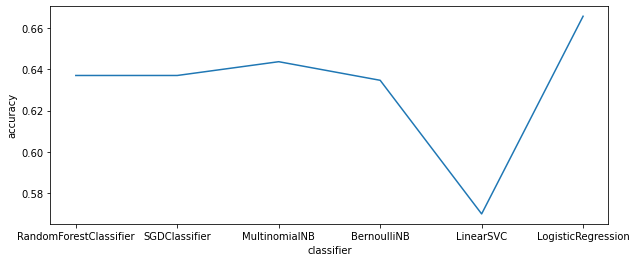

In [125]:
names = ['RandomForestClassifier', 'SGDClassifier', 'MultinomialNB', 'BernoulliNB', 'LinearSVC', 'LogisticRegression']

import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.ylabel('accuracy')
plt.xlabel('classifier')
plt.plot(names,accuracy)
plt.show()